# Análisis del Conjunto de Datos de Precios de Aguacate

**Conjunto de Datos de Precios de Aguacate**: El conjunto de datos "Precios de Aguacate", obtenido de Kaggle, es un conjunto de datos ampliamente utilizado para proyectos de análisis de datos y aprendizaje automático. Proporciona datos históricos sobre precios y ventas de aguacates en varias regiones de los Estados Unidos. Este conjunto de datos es valioso para entender las tendencias en los precios de los aguacates, los volúmenes de ventas y su relación con diferentes factores.

## Atributos Clave

- **Columnas**: El conjunto de datos incluye varias columnas de información. Algunas de las columnas clave típicamente encontradas en este conjunto de datos incluyen:
    - **Fecha** (`Date`): La fecha de observación.
    - **Precio Promedio** (`AveragePrice`): El precio promedio de los aguacates.
    - **Volumen Total** (`Total Volume`): El volumen total de aguacates vendidos.
    - **4046**: Volumen de aguacates Hass pequeños vendidos.
    - **4225**: Volumen de aguacates Hass grandes vendidos.
    - **4770**: Volumen de aguacates Hass extra grandes vendidos.
    - **Bolsas Totales** (`Total Bags`): Total de bolsas de aguacates vendidas.
    - **Bolsas Pequeñas** (`Small Bags`): Bolsas de aguacates pequeños vendidas.
    - **Bolsas Grandes** (`Large Bags`): Bolsas de aguacates grandes vendidas.
    - **Bolsas Extra Grandes** (`XLarge Bags`): Bolsas de aguacates extra grandes vendidas.
    - **Tipo** (`Type`): El tipo de aguacates, generalmente categorizados como convencionales u orgánicos.
    - **Región** (`Region`): La región o ciudad dentro de los Estados Unidos donde se registraron los datos.

- **Rango de Fechas**: El conjunto de datos abarca un rango de fechas, lo que permite el análisis de series de tiempo. Puedes examinar cómo cambian los precios y ventas de aguacates a lo largo de diferentes estaciones y años.

- **Regiones**: Se proporciona información para varias regiones o ciudades a través de los Estados Unidos, lo que permite el análisis de variaciones de precios y ventas en diferentes mercados.

- **Tipos**: El conjunto de datos distingue entre diferentes tipos de aguacates, como convencionales y orgánicos, lo que puede ser útil para comparar tendencias de precios entre estas categorías.

- **Volumen**: Están disponibles datos sobre el volumen total de aguacates vendidos. Esta métrica de volumen se utiliza a menudo para analizar la demanda del mercado.

- **Precio Promedio**: El conjunto de datos contiene el precio promedio de los aguacates, una métrica fundamental para entender las tendencias de precios.

## Casos de Uso

- Este conjunto de datos se utiliza comúnmente para aprender y practicar el análisis de datos, visualización de datos y modelado de regresión en proyectos de ciencia de datos y aprendizaje automático.

- Sirve como un recurso valioso para entender cómo trabajar con datos del mundo real, extraer conocimientos y tomar decisiones basadas en datos.

---

## Actividades de Análisis

### 1. **Análisis de Series Temporales**
**Resumen:** El análisis de series temporales permite identificar patrones, tendencias y estacionalidades en los precios y volúmenes de ventas de aguacates a lo largo del tiempo.


1. **Descomposición de Series Temporales de Precios:** 
   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.

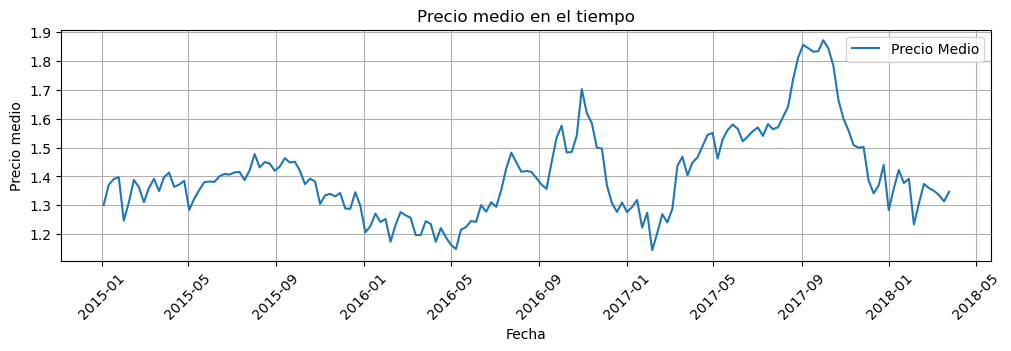

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])
#df_cp

df_date_price = df_cp[['Date', 'AveragePrice']]

df_grouped = df_cp.groupby('Date')['AveragePrice'].mean()
#df_grouped

# Graficar
plt.figure(figsize=(12, 3))
plt.plot(df_grouped, label ='Precio Medio')
plt.legend(loc='best')
plt.xlabel('Fecha')
plt.ylabel('Precio medio')
plt.title('Precio medio en el tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
df_date_price

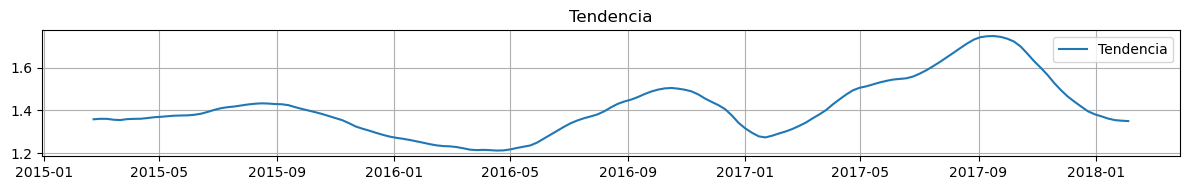

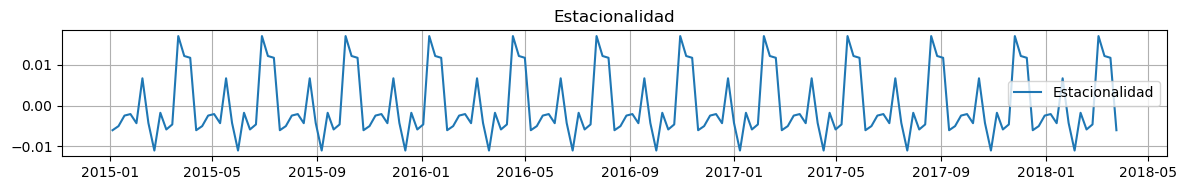

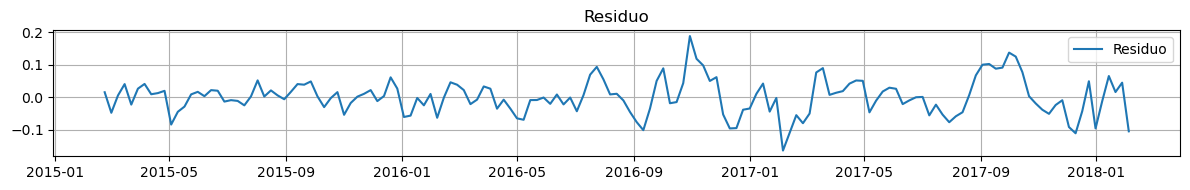

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

# Descomposicio de la serie de tiemps
df_decomp = seasonal_decompose(df_grouped, model='additive', period=14) #maxim: 84

# Graficar
plt.figure(figsize=(12, 2))
plt.plot(df_decomp.trend, label='Tendencia')
plt.legend(loc='best')
plt.title('Tendencia')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 2))
plt.plot(df_decomp.seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.title('Estacionalidad')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 2))
plt.plot(df_decomp.resid, label='Residuo')
plt.legend(loc='best')
plt.title('Residuo')
plt.grid(True)
plt.tight_layout()
plt.show()

### Nota:

`seasonal_decompose` es una función de la biblioteca `statsmodels` que se utiliza para descomponer una serie temporal en sus componentes principales: tendencia, estacionalidad y residuos. En esencia, busca separar las diferentes componentes que influyen en los datos a lo largo del tiempo.

**Componentes de la descomposición:**

* **Tendencia (Trend):** Representa la variación a largo plazo de la serie.  Piensa en la dirección general que siguen los datos a través del tiempo. Puede ser ascendente, descendente o constante.
* **Estacionalidad (Seasonality):**  Se refiere a patrones que se repiten a intervalos regulares de tiempo. Por ejemplo, las ventas de helados tienden a aumentar en verano y disminuir en invierno, mostrando un patrón estacional anual.  El período de estacionalidad es la duración de este ciclo repetitivo (e.g., semanal, mensual, anual).
* **Residuos (Residuals):**  Representan la parte aleatoria o irregular de la serie, lo que no puede explicarse por la tendencia ni la estacionalidad.  Estos son los datos restantes después de eliminar la tendencia y la estacionalidad.  Un buen modelo de descomposición debería tener residuos que parezcan ruido blanco (sin patrones claros).

**Cómo funciona `seasonal_decompose`:**

La función toma una serie temporal como entrada y utiliza un modelo para separar los datos en sus componentes.  El modelo puede ser `'additive'` o `'multiplicative'`.

* **Modelo aditivo:**  Asume que los componentes se suman para formar la serie:  `Serie = Tendencia + Estacionalidad + Residuos`.  Este modelo es adecuado cuando la amplitud de la estacionalidad se mantiene relativamente constante a lo largo del tiempo.

* **Modelo multiplicativo:**  Asume que los componentes se multiplican: `Serie = Tendencia * Estacionalidad * Residuos`. Este modelo es apropiado cuando la amplitud de la estacionalidad aumenta o disminuye con la tendencia.

El parámetro `period` especifica la duración del ciclo estacional. Por ejemplo, si tus datos tienen un patrón semanal, el período sería 7.  Si es mensual, sería 12 para un patrón anual.  La elección correcta del período es crucial para la precisión de la descomposición.

### Nota:

"Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido."


Se refiere a la visualización gráfica de los diferentes componentes de una serie de tiempo después de aplicar una descomposición para separar la serie temporal original (`df_grouped`) en las componentes:

a. **Tendencia (Trend):**  Muestra la dirección general a largo plazo de la serie.  Es la parte de la serie que cambia gradualmente a lo largo del tiempo.

b. **Estacionalidad (Seasonality):**  Representa patrones repetitivos que ocurren a intervalos regulares (semanales, mensuales, anuales, etc.). Por ejemplo, las ventas de helados tienden a ser más altas en verano.  En tu código, `period=7` sugiere una estacionalidad semanal.

c. **Residuos (Residuals):**  Es la parte de la serie que no se explica por la tendencia ni la estacionalidad.  Idealmente, los residuos deberían parecerse a ruido aleatorio.  Si hay patrones claros en los residuos, significa que el modelo de descomposición no ha capturado todos los aspectos importantes de la serie.

2. **Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.

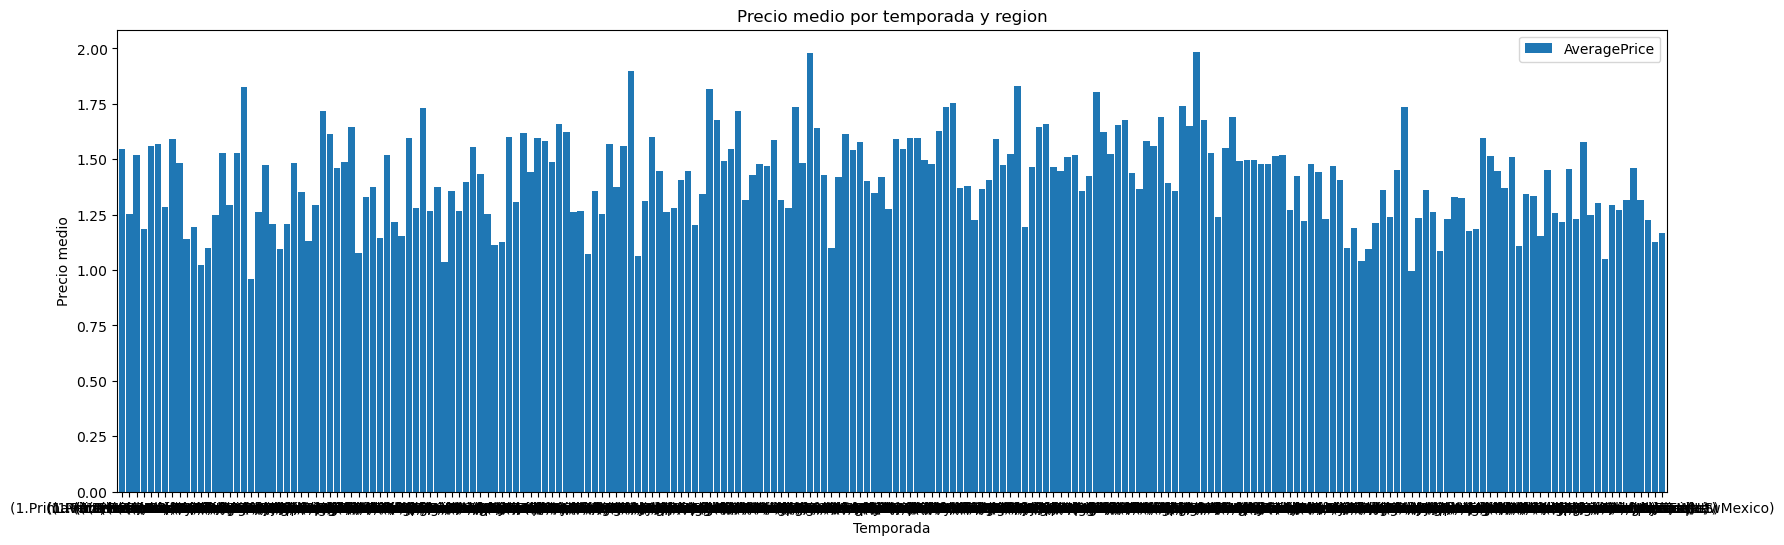

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])
#df_cp.info()
get_season = lambda date: '1.Primavera' if 3 <= date.month <= 5 else ('2.Verano' if 6 <= date.month <= 8 else ('3.Otoño' if 9 <= date.month <= 11 else '4.Invierno'))

# No ho fem servir ??
df_date_price_volume = df_cp[['Date', 'region', 'AveragePrice','Total Volume']]
df_date_price_volume = df_date_price_volume.reset_index()
df_date_price_volume['Season'] = df_date_price_volume['Date'].apply(get_season)
# df_date_price_volume

df_grouped_mean = df_date_price_volume.groupby(['Season','region'])['AveragePrice'].mean()
df_grouped_mean

df_grouped_mean.plot(kind='bar', figsize=(20, 6), width=.9)
plt.title('Precio medio por temporada y region')
plt.xlabel('Temporada')
plt.ylabel('Precio medio')
plt.xticks(rotation=0)  
plt.legend(loc='best') # .legend(title='Regiones', loc='right')
plt.show()

3. **Comparación de Precios Promedio Mensuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.

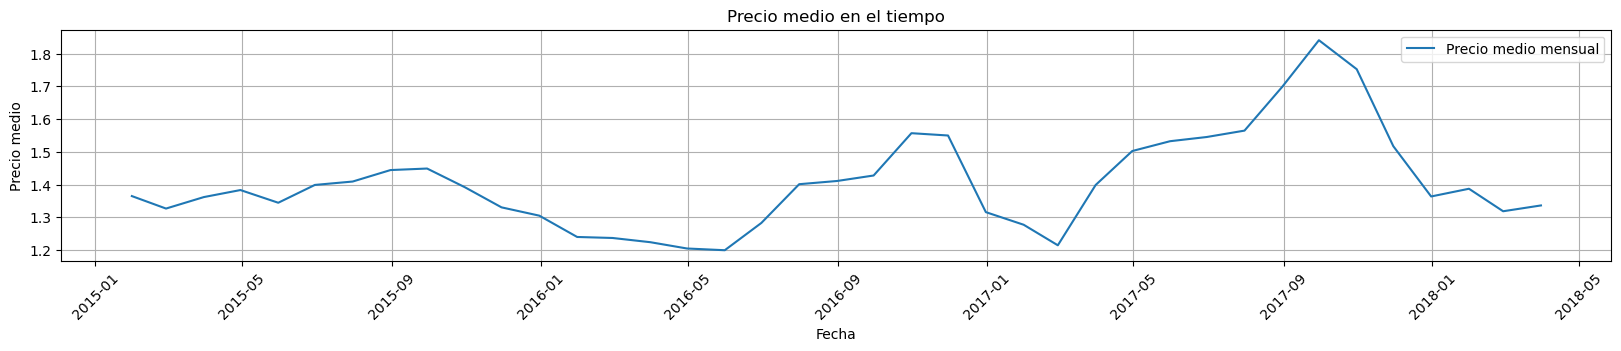

Date
2015-01-31    1.365046
2015-02-28    1.326944
2015-03-31    1.361981
2015-04-30    1.383449
2015-05-31    1.344685
2015-06-30    1.399074
2015-07-31    1.409444
2015-08-31    1.444481
2015-09-30    1.449144
2015-10-31    1.391968
2015-11-30    1.330611
2015-12-31    1.305244
2016-01-31    1.240185
2016-02-29    1.237106
2016-03-31    1.224213
2016-04-30    1.205023
2016-05-31    1.199722
2016-06-30    1.283056
2016-07-31    1.401333
2016-08-31    1.411111
2016-09-30    1.427870
2016-10-31    1.557093
2016-11-30    1.550023
2016-12-31    1.315995
2017-01-31    1.277500
2017-02-28    1.214792
2017-03-31    1.398935
2017-04-30    1.502611
2017-05-31    1.532593
2017-06-30    1.545395
2017-07-31    1.564926
2017-08-31    1.698958
2017-09-30    1.840949
2017-10-31    1.752444
2017-11-30    1.517292
2017-12-31    1.363852
2018-01-31    1.387431
2018-02-28    1.318704
2018-03-31    1.336458
Freq: M, Name: AveragePrice, dtype: float64

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])
df_cp
df_grouped = df_cp.groupby(pd.Grouper(key='Date', freq='M'))['AveragePrice'].mean()

plt.figure(figsize=(20,3))
plt.plot(df_grouped.index, df_grouped.values, label='Precio medio mensual') #plt.plot(df_grouped)
plt.legend(loc='best')
plt.xlabel('Fecha')
plt.ylabel('Precio medio')
plt.title('Precio medio en el tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
df_grouped

4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.

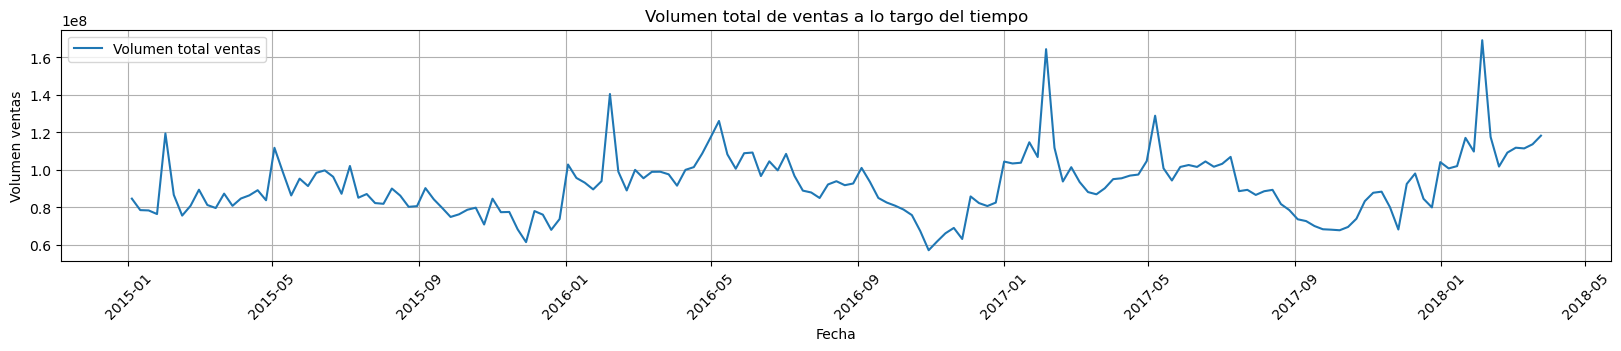

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])
#df_cp.info()

df_date_volume = df_cp[['Date', 'Total Volume']]
df_date_volume
df_grouped = df_date_volume.groupby('Date').sum('Total Volume')

# Graficar
plt.figure(figsize=(20,3))
plt.plot(df_grouped, label='Volumen total ventas')
plt.legend(loc='best')
plt.title('Volumen total de ventas a lo targo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Volumen ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.

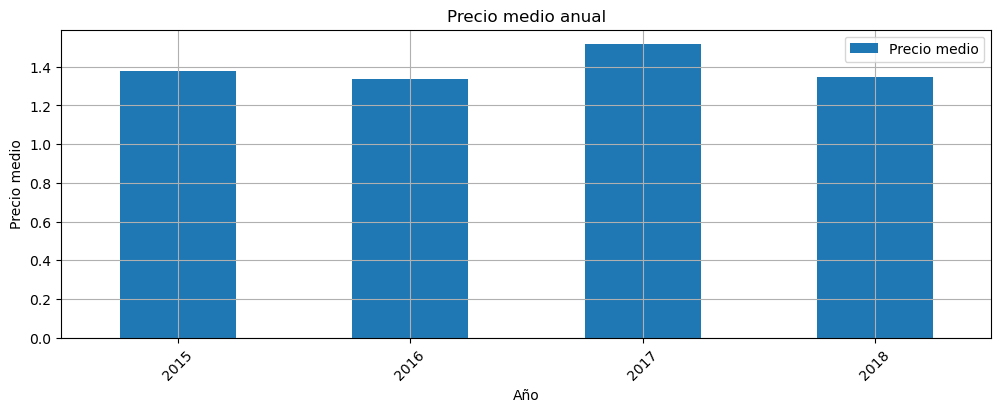

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])
df_cp = df_cp.rename(columns={df.columns[0]: 'Col_0'})

df_year_price = df_cp.groupby('year')['AveragePrice'].mean()

# Graficar
plt.figure(figsize=(12, 4)) 
df_year_price.plot.bar(label ='Precio medio') # x='aaa??',y='bbb??',
#plt.bar(df_year_rice['year'], df_year_rice['AveragePrice'])
plt.legend(loc='best')
plt.xlabel('Año')
plt.ylabel('Precio medio')
plt.title('Precio medio anual')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

display(df_year_price)